In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler



In [2]:
data =pd.read_csv("/kaggle/input/predict-restaurant-menu-items-profitability/restaurant_menu_optimization_data.csv")

In [3]:
data.head()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium


In [4]:
data.duplicated().sum()

27

In [5]:
data[data.duplicated()]

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
108,R001,Beverages,Soda,['confidential'],2.81,Low
185,R001,Beverages,Soda,['confidential'],4.05,Medium
244,R002,Beverages,Iced Tea,['confidential'],2.73,Low
261,R002,Beverages,Iced Tea,['confidential'],3.65,Medium
304,R001,Desserts,Chocolate Lava Cake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",17.44,High
363,R001,Beverages,Soda,['confidential'],2.81,Low
404,R002,Appetizers,Bruschetta,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",9.81,Medium
437,R002,Appetizers,Bruschetta,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",9.81,Medium
498,R002,Main Course,Shrimp Scampi,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",18.43,Medium
577,R003,Beverages,Iced Tea,['confidential'],4.40,Medium


In [6]:
data.drop_duplicates(inplace=True)

In [7]:
data.isna().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [8]:
len(data)

973

In [9]:
data.tail()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High
999,R001,Beverages,Soda,['confidential'],4.26,Medium


<Axes: xlabel='Profitability', ylabel='count'>

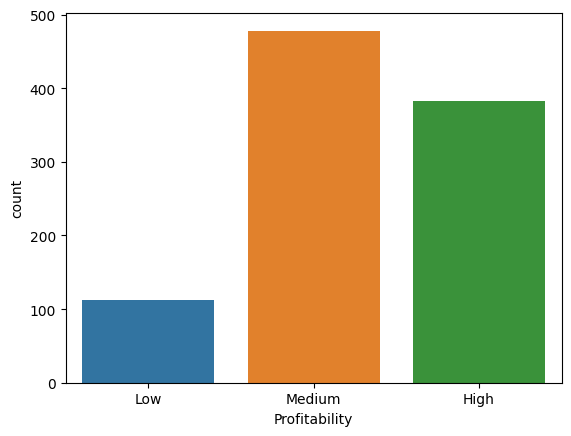

In [10]:
#UnBalanced
sns.countplot(x =data['Profitability'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


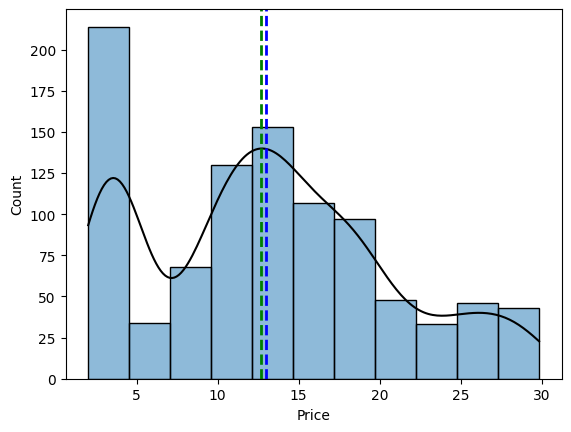

In [11]:
g=sns.histplot(data['Price'], kde=True)
g.lines[0].set_color('black')
g.axvline(x=data['Price'].mean(), color='b', label='Mean', linestyle='--', linewidth=2)
g.axvline(x=data['Price'].median(), color='g', label='Median', linestyle='--', linewidth=2)

<Axes: xlabel='MenuCategory', ylabel='count'>

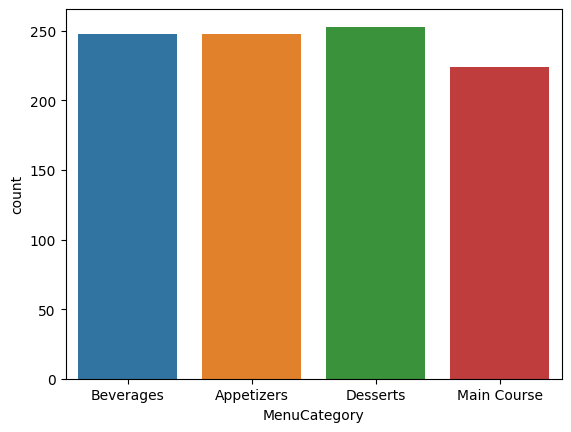

In [12]:
sns.countplot(x= data['MenuCategory'])

<Axes: xlabel='count', ylabel='MenuItem'>

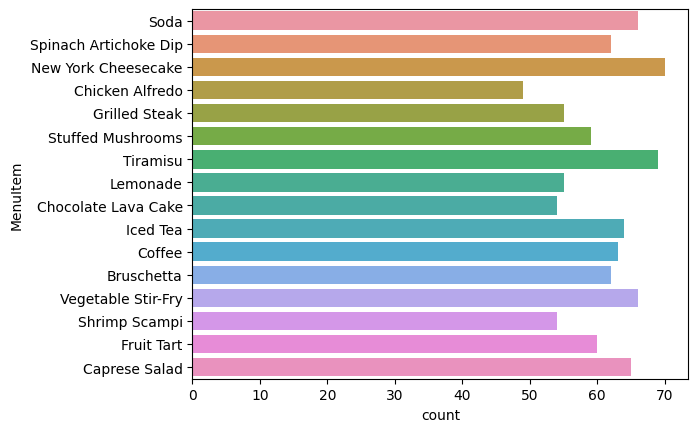

In [13]:
sns.countplot( y=data['MenuItem'])

<Axes: xlabel='count', ylabel='Ingredients'>

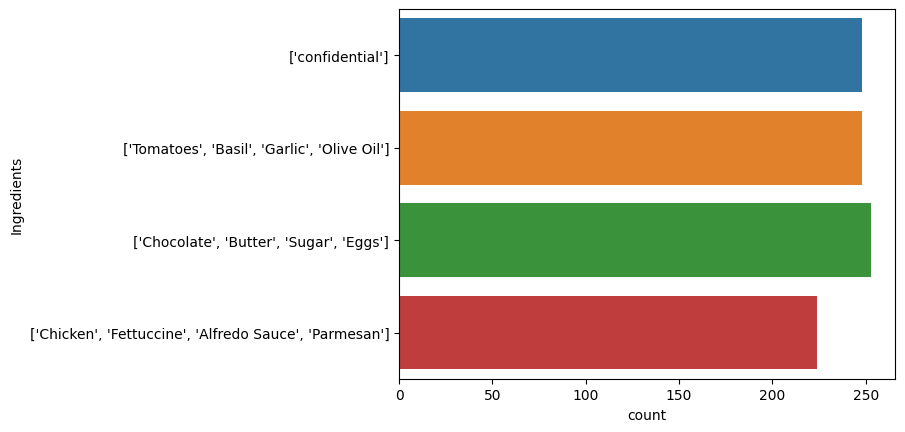

In [14]:
sns.countplot( y= data['Ingredients'])

In [15]:
#_wrapper={'Low':0,"Medium":1,"High":2}
#data.Profitability.replace(sex_wrapper,inplace=True)
data[data["RestaurantID"]=='R003']['MenuCategory'].value_counts()

MenuCategory
Beverages      88
Desserts       81
Appetizers     77
Main Course    69
Name: count, dtype: int64

In [16]:
data[data["RestaurantID"]=='R002']['MenuCategory'].value_counts()

MenuCategory
Desserts       85
Main Course    81
Appetizers     76
Beverages      73
Name: count, dtype: int64

In [17]:
data[data["RestaurantID"]=='R001']['MenuCategory'].value_counts()

MenuCategory
Appetizers     95
Beverages      87
Desserts       87
Main Course    74
Name: count, dtype: int64

In [18]:
data.drop('RestaurantID',inplace=True,axis=1)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MenuCategory   973 non-null    object 
 1   MenuItem       973 non-null    object 
 2   Ingredients    973 non-null    object 
 3   Price          973 non-null    float64
 4   Profitability  973 non-null    object 
dtypes: float64(1), object(4)
memory usage: 45.6+ KB


In [20]:
len(data['MenuItem'])

973

In [21]:
data['MenuItem'].value_counts()

MenuItem
New York Cheesecake      70
Tiramisu                 69
Soda                     66
Vegetable Stir-Fry       66
Caprese Salad            65
Iced Tea                 64
Coffee                   63
Spinach Artichoke Dip    62
Bruschetta               62
Fruit Tart               60
Stuffed Mushrooms        59
Grilled Steak            55
Lemonade                 55
Chocolate Lava Cake      54
Shrimp Scampi            54
Chicken Alfredo          49
Name: count, dtype: int64

In [22]:
cols = ['MenuItem_Iced Tea','MenuItem_New York Cheesecake','MenuItem_Tiramisu','MenuItem_Soda','MenuItem_Caprese Salad','MenuItem_Vegetable Stir-Fry','MenuItem_Coffee','MenuItem_Spinach Artichoke Dip','MenuItem_Bruschetta','MenuItem_Fruit Tart','MenuItem_Mushrooms','MenuItem_Lemonade','MenuItem_Chocolate Lava Cake','MenuItem_Grilled Steak','MenuItem_Shrimp Scampi','MenuItem_Chicken Alfredo']

In [23]:

one_encoder =OneHotEncoder()
Menu_encoded =one_encoder.fit_transform(data[['MenuItem']]).toarray()
feature_names = one_encoder.get_feature_names_out(['MenuItem'])


In [24]:
M_encoded =pd.DataFrame(Menu_encoded,columns=feature_names)

In [25]:
M_encoded.head()

,MenuItem_Bruschetta,MenuItem_Caprese Salad,MenuItem_Chicken Alfredo,MenuItem_Chocolate Lava Cake,MenuItem_Coffee,MenuItem_Fruit Tart,MenuItem_Grilled Steak,MenuItem_Iced Tea,MenuItem_Lemonade,MenuItem_New York Cheesecake,MenuItem_Shrimp Scampi,MenuItem_Soda,MenuItem_Spinach Artichoke Dip,MenuItem_Stuffed Mushrooms,MenuItem_Tiramisu,MenuItem_Vegetable Stir-Fry
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
scalar =MinMaxScaler()
p_scaled =scalar.fit_transform(data[['Price']])

In [27]:
one_encoder =OneHotEncoder()
category_encoded =one_encoder.fit_transform(data[['MenuCategory']]).toarray()
feature_names1 = one_encoder.get_feature_names_out(['MenuCategory'])


In [28]:
C_encoded =pd.DataFrame(category_encoded,columns=feature_names1)

In [29]:

Ingred_encoded =one_encoder.fit_transform(data[['Ingredients']]).toarray()
feature_names3 = one_encoder.get_feature_names_out(['Ingredients'])


In [30]:
I_encoded=pd.DataFrame(Ingred_encoded,columns=feature_names3)

In [31]:
x=data.drop(["Profitability","Price"],axis=1)
y=data["Profitability"]

In [32]:

price_df =pd.DataFrame(p_scaled,columns=['Price'])

In [33]:
x=pd.concat([C_encoded,M_encoded,I_encoded,x,price_df],axis=1)

In [34]:
x.drop(['MenuItem',"MenuCategory","Ingredients"],inplace=True,axis=1)

In [35]:
x.head()

,MenuCategory_Appetizers,MenuCategory_Beverages,MenuCategory_Desserts,MenuCategory_Main Course,MenuItem_Bruschetta,MenuItem_Caprese Salad,MenuItem_Chicken Alfredo,MenuItem_Chocolate Lava Cake,MenuItem_Coffee,MenuItem_Fruit Tart,...,MenuItem_Soda,MenuItem_Spinach Artichoke Dip,MenuItem_Stuffed Mushrooms,MenuItem_Tiramisu,MenuItem_Vegetable Stir-Fry,"Ingredients_['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Parmesan']","Ingredients_['Chocolate', 'Butter', 'Sugar', 'Eggs']","Ingredients_['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",Ingredients_['confidential'],Price
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.019404
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.327345
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.598275
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.989580
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.564858


In [36]:
x.dropna(inplace=True)

In [37]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(x, y)

<Axes: xlabel='Profitability', ylabel='count'>

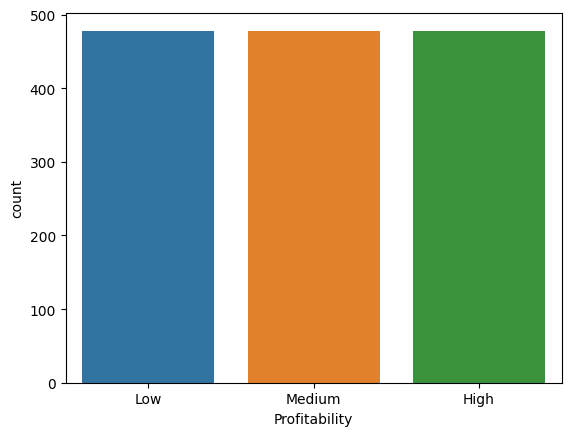

In [38]:
sns.countplot(x=y_resampled)

In [39]:
x_train,x_test,y_train,y_test=train_test_split(X_resampled,y_resampled,test_size=0.2,shuffle=True,random_state=42)

In [40]:
RFC = RandomForestClassifier(n_estimators=16, max_depth =4,random_state=42)
RFC=RFC.fit(x_train,y_train)

In [41]:
ypred_test =RFC.predict(x_test)

In [42]:
score =accuracy_score(y_test,ypred_test)
print(f'accuracy : {score*100:.2f} %')


accuracy : 84.32 %


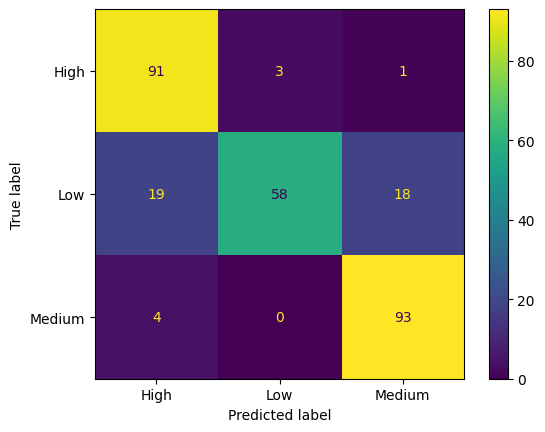

In [43]:
cm =confusion_matrix(y_test,ypred_test,labels=RFC.classes_)
cm_display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=RFC.classes_)
cm_display.plot()
plt.show()